In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
data = pd.read_csv('UNCLEANIMPDATA.csv')

In [3]:
data.drop(columns=['Country Code', 'Time Code'], inplace=True)

data.head()

data.columns.tolist()

['Country Name',
 'Time',
 'Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]',
 'Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]',
 'GDP (current US$) [NY.GDP.MKTP.CD]',
 'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]',
 'GDP per capita (current US$) [NY.GDP.PCAP.CD]',
 'GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG]',
 'Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]',
 'Trade (% of GDP) [NE.TRD.GNFS.ZS]',
 'Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]',
 'Gross capital formation (annual % growth) [NE.GDI.TOTL.KD.ZG]',
 'Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]',
 'Net ODA received (% of GNI) [DT.ODA.ODAT.GN.ZS]',
 'Agriculture, forestry, and fishing, value added (annual % growth) [NV.AGR.TOTL.KD.ZG]',
 'Industry (including construction), value added (annual % growth) [NV.IND.TOTL.KD.ZG]',
 'Services, value added (annual % growth) [NV.SRV.TOTL.KD.ZG]',
 'Employment in agriculture (% of 

In [4]:
def clean_column_name(name):
    if '[' in name:
        return name.split(' [')[0]
    return name

data.columns = [clean_column_name(col) for col in data.columns]

data.columns.tolist()

['Country Name',
 'Time',
 'Exports of goods and services (% of GDP)',
 'Foreign direct investment, net inflows (% of GDP)',
 'GDP (current US$)',
 'GDP growth (annual %)',
 'GDP per capita (current US$)',
 'GDP per capita growth (annual %)',
 'Inflation, GDP deflator (annual %)',
 'Trade (% of GDP)',
 'Imports of goods and services (% of GDP)',
 'Gross capital formation (annual % growth)',
 'Unemployment, total (% of total labor force) (modeled ILO estimate)',
 'Net ODA received (% of GNI)',
 'Agriculture, forestry, and fishing, value added (annual % growth)',
 'Industry (including construction), value added (annual % growth)',
 'Services, value added (annual % growth)',
 'Employment in agriculture (% of total employment) (modeled ILO estimate)',
 'Employment in industry (% of total employment) (modeled ILO estimate)',
 'Employment in services (% of total employment) (modeled ILO estimate)',
 'Government Effectiveness: Estimate',
 'Mobile cellular subscriptions',
 'Regulatory Quality:

In [5]:
data = data[:-5]
data.replace('..', np.nan, inplace=True)

data.head(2000)

Country Name    Time  Exports of goods and services (% of GDP)  \
0         Uganda  2002.0                                 11.213279   
1         Uganda  2003.0                                 11.386725   
2         Uganda  2004.0                                 12.696881   
3         Uganda  2005.0                                 14.179700   
4         Uganda  2006.0                                 15.275413   
..           ...     ...                                       ...   
520      Tunisia  2018.0                                 45.485668   
521      Tunisia  2019.0                                 45.950443   
522      Tunisia  2020.0                                 37.991769   
523      Tunisia  2021.0                                 42.013096   
524      Tunisia  2022.0                                 51.429715   

    Foreign direct investment, net inflows (% of GDP)  GDP (current US$)  \
0                                    2.98852729237692       6.178564e+09   
1                                    3.06033199910157       6.606884e+09   
2                                    3.72085072270847       7.939488e+09   
3                                    4.11082611076276       9.239222e+09   
4                                    6.45705802026041       9.977648e+09   
..                                                ...                ...   
520                                  2.32247623873919       4.268658e+10   
521                                  1.94488124430609       4.190554e+10   
522                                   1.4663418220259       4.249182e+10   
523                                  1.16937529005457       4.681229e+10   
524                                  1.44283667390745       4.457976e+10   

     GDP growth (annual %)  GDP per capita (current US$)  \
0                 8.732686                    241.868930   
1                 6.473259                    250.690588   
2                 6.807233                    292.472666   
3                 6.332565                    330.602854   
4                10.784744                    346.768462   
..                     ...                           ...   
520               2.624930                   3577.175342   
521               1.587847                   3477.836181   
522              -8.591826                   3493.897738   
523               4.605187                   3817.377174   
524               2.603961                   3607.910238   

     GDP per capita growth (annual %)  Inflation, GDP deflator (annual %)  \
0                            5.405103                           -3.169556   
1                            3.202285                            7.806741   
2                            3.693646                           15.587550   
3                            3.286768                           -1.741185   
4                            7.601960                            2.405620   
..                                ...                                 ...   
520                          1.579179                            7.924855   
521                          0.607548                            7.134761   
522                         -9.436698                            6.315167   
523                          3.741736                            4.647716   
524                          1.830278                            3.124618   

     Trade (% of GDP)  ...  Mobile cellular subscriptions  \
0           36.277794  ...                         393310   
1           36.585726  ...                         776169   
2           35.460086  ...                        1165035   
3           38.994285  ...                        1315300   
4           43.633286  ...                        2008818   
..                ...  ...                            ...   
520        103.871640  ...                       14769594   
521        102.332864  ...                       14771048   
522         84.333259  ...                       148528

In [6]:
for col in data.columns:
    if col != 'Country Name':
        data[col] = pd.to_numeric(data[col], errors='coerce')
        
data.dtypes

Country Name                                                                 object
Time                                                                        float64
Exports of goods and services (% of GDP)                                    float64
Foreign direct investment, net inflows (% of GDP)                           float64
GDP (current US$)                                                           float64
GDP growth (annual %)                                                       float64
GDP per capita (current US$)                                                float64
GDP per capita growth (annual %)                                            float64
Inflation, GDP deflator (annual %)                                          float64
Trade (% of GDP)                                                            float64
Imports of goods and services (% of GDP)                                    float64
Gross capital formation (annual % growth)                                   

In [7]:
def sanitize_country_name(name):
    return (
        name.lower()
        .replace(' ', '')
        .replace('-', '')
        .replace('(', '')
        .replace(')', '')
        .replace(',', '')
        .replace('.', '')
        .replace("'", '')
    )

country_names = data['Country Name'].unique()
country_var_names = [f"df_{sanitize_country_name(country)}" for country in country_names]

for country, var_name in zip(country_names, country_var_names):
    sanitized_country = country.replace("'", "\\'")
    exec(f"{var_name} = data[data['Country Name'] == '{sanitized_country}'].reset_index(drop=True)")

print("DataFrames created for each country:")
for name in country_var_names:
    print(name)


DataFrames created for each country:
df_uganda
df_egyptarabrep
df_southafrica
df_tanzania
df_morocco
df_cameroon
df_senegal
df_congodemrep
df_algeria
df_sudan
df_angola
df_ghana
df_madagascar
df_guinea
df_rwanda
df_benin
df_burundi
df_togo
df_mauritania
df_botswana
df_namibia
df_mauritius
df_kenya
df_burkinafaso
df_tunisia


# MVAL IDENTIFICATION FUNCS

In [8]:
def check_missing_values(country_var_name):
    df = eval(country_var_name)
    missing_counts = df.isna().sum()
    total_counts = len(df)
    missing_percentage = (missing_counts / total_counts) * 100
    missing_df = pd.DataFrame({
        'Missing Values': missing_counts,
        'Percentage': missing_percentage
    })
    print(f"Missing values for {country_var_name}:")
    print(missing_df)

def show_missing_values(country_var_name):
    df = eval(country_var_name)
    missing_data = {}
    
    for column in df.columns:
        missing_years = df[df[column].isna()]['Time'].tolist()
        if missing_years:
            missing_data[column] = missing_years
    
    if not missing_data:
        print(f"No missing values found in {country_var_name}.")
    else:
        print(f"Missing values for {country_var_name}:")
        for column, years in missing_data.items():
            print(f"{column}: {years}")
            
            
import matplotlib.pyplot as plt
import pandas as pd

def visualize_indicator_with_gaps(country_df, indicator, country_name):
    
    country_df['Time'] = pd.to_numeric(country_df['Time'], errors='coerce')
    
    country_df[indicator] = pd.to_numeric(country_df[indicator], errors='coerce')
    
    indicator_data = country_df[['Time', indicator]]
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(indicator_data['Time'], indicator_data[indicator], marker='o', linestyle='-', label=indicator)
    
    plt.xticks(range(2003, 2023))
    
    plt.title(f'{indicator} for {country_name}')
    plt.xlabel('Year')
    plt.ylabel(indicator)
    plt.legend()
    plt.grid(True)
    plt.show()

# IMP FUNCS

In [9]:
def apply_custom_imputation(df, column, imputation_dict):
    df = df.copy()
    
    for year, method in imputation_dict.items():
        if method == 'poly':
            x = df['Time'][df[column].notna()]
            y = df[column][df[column].notna()]
            poly_interp = np.poly1d(np.polyfit(x, y, 2))
            df.loc[df['Time'] == year, column] = poly_interp(year) 
        
        
        elif method == 'mean':
            mean_value = df[column][df['Time'].notna()].mean()
            df.loc[df['Time'] == year, column] = mean_value
    
    return df[column]

def add_imputed_values(original_df, column, imputed_values):
    new_df = original_df.copy()
    new_df[column] = imputed_values
    return new_df


import matplotlib.pyplot as plt

def visualize_comparison(country_df, indicator, country_name, imputed_df):
   
    country_df['Time'] = pd.to_numeric(country_df['Time'], errors='coerce')
    imputed_df['Time'] = pd.to_numeric(imputed_df['Time'], errors='coerce')

    country_df[indicator] = pd.to_numeric(country_df[indicator], errors='coerce')
    imputed_df[indicator] = pd.to_numeric(imputed_df[indicator], errors='coerce')

    indicator_data_original = country_df[['Time', indicator]]
    indicator_data_imputed = imputed_df[['Time', indicator]]

    plt.figure(figsize=(10, 6))

    plt.plot(indicator_data_original['Time'], indicator_data_original[indicator], marker='o', linestyle='-', label='Original with Gaps')

    plt.plot(indicator_data_imputed['Time'], indicator_data_imputed[indicator], marker='x', linestyle='--', label='Imputed Values')

    plt.xticks(range(2003, 2023))

    plt.title(f'{indicator} for {country_name}')
    plt.xlabel('Year')
    plt.ylabel(indicator)
    plt.legend()
    plt.grid(True)
    plt.show()
    

# UGANDA

In [10]:
check_missing_values('df_uganda')

print('-------------------------------------')

show_missing_values('df_uganda')

Missing values for df_uganda:
                                                    Missing Values  Percentage
Country Name                                                     0    0.000000
Time                                                             0    0.000000
Exports of goods and services (% of GDP)                         0    0.000000
Foreign direct investment, net inflows (% of GDP)                0    0.000000
GDP (current US$)                                                0    0.000000
GDP growth (annual %)                                            0    0.000000
GDP per capita (current US$)                                     0    0.000000
GDP per capita growth (annual %)                                 0    0.000000
Inflation, GDP deflator (annual %)                               0    0.000000
Trade (% of GDP)                                                 0    0.000000
Imports of goods and services (% of GDP)                         0    0.000000
Gross capital formatio

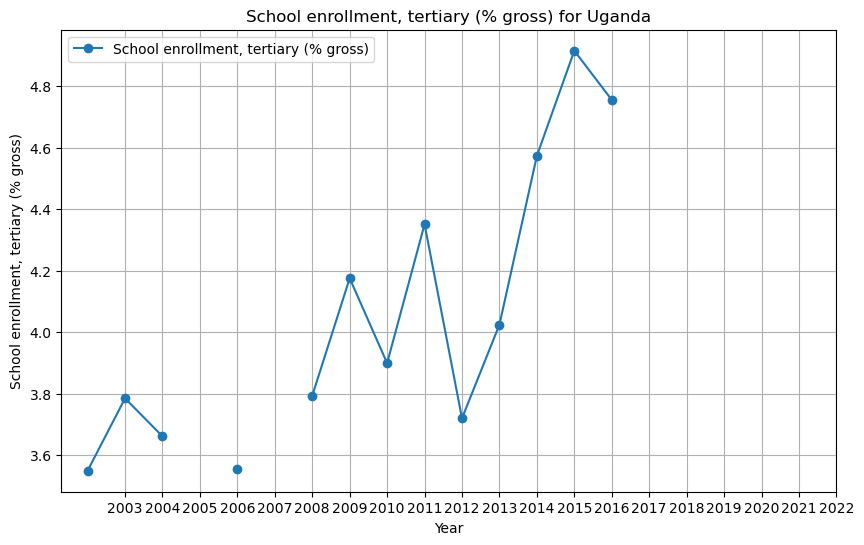

In [11]:
visualize_indicator_with_gaps(df_uganda, 'School enrollment, tertiary (% gross)', 'Uganda')


In [12]:
imputation_methods_school_ug = {
    2005: 'poly',
    2007: 'poly',
    2017: 'mean',
    2018: 'mean',
    2019: 'mean',
    2020: 'mean',
    2021: 'mean',
    2022: 'mean'
}

df_uganda['School enrollment, tertiary (% gross)'] = apply_custom_imputation(
    df_uganda, 
    'School enrollment, tertiary (% gross)', 
    imputation_methods_school_ug
)

In [13]:
imputation_methods_int_ug = {
    2022: 'mean'
}

df_uganda['Individuals using the Internet (% of population)'] = apply_custom_imputation(
    df_uganda, 
    'Individuals using the Internet (% of population)', 
    imputation_methods_int_ug
)

In [14]:
check_missing_values('df_uganda')

print('-------------------------------------')

show_missing_values('df_uganda')

Missing values for df_uganda:
                                                    Missing Values  Percentage
Country Name                                                     0         0.0
Time                                                             0         0.0
Exports of goods and services (% of GDP)                         0         0.0
Foreign direct investment, net inflows (% of GDP)                0         0.0
GDP (current US$)                                                0         0.0
GDP growth (annual %)                                            0         0.0
GDP per capita (current US$)                                     0         0.0
GDP per capita growth (annual %)                                 0         0.0
Inflation, GDP deflator (annual %)                               0         0.0
Trade (% of GDP)                                                 0         0.0
Imports of goods and services (% of GDP)                         0         0.0
Gross capital formatio

# EGYPT

In [15]:
check_missing_values('df_egyptarabrep')

print('-------------------------------------')

show_missing_values('df_egyptarabrep')

Missing values for df_egyptarabrep:
                                                    Missing Values  Percentage
Country Name                                                     0     0.00000
Time                                                             0     0.00000
Exports of goods and services (% of GDP)                         0     0.00000
Foreign direct investment, net inflows (% of GDP)                0     0.00000
GDP (current US$)                                                0     0.00000
GDP growth (annual %)                                            0     0.00000
GDP per capita (current US$)                                     0     0.00000
GDP per capita growth (annual %)                                 0     0.00000
Inflation, GDP deflator (annual %)                               0     0.00000
Trade (% of GDP)                                                 0     0.00000
Imports of goods and services (% of GDP)                         0     0.00000
Gross capital fo

In [16]:
imputation_methods_school_egypt = {

    2019: 'poly',

    2021: 'poly',

}

df_egyptarabrep['School enrollment, tertiary (% gross)'] = apply_custom_imputation(
    df_egyptarabrep, 
    'School enrollment, tertiary (% gross)', 
    imputation_methods_school_egypt
)

In [17]:
check_missing_values('df_egyptarabrep')

print('-------------------------------------')

show_missing_values('df_egyptarabrep')

Missing values for df_egyptarabrep:
                                                    Missing Values  Percentage
Country Name                                                     0         0.0
Time                                                             0         0.0
Exports of goods and services (% of GDP)                         0         0.0
Foreign direct investment, net inflows (% of GDP)                0         0.0
GDP (current US$)                                                0         0.0
GDP growth (annual %)                                            0         0.0
GDP per capita (current US$)                                     0         0.0
GDP per capita growth (annual %)                                 0         0.0
Inflation, GDP deflator (annual %)                               0         0.0
Trade (% of GDP)                                                 0         0.0
Imports of goods and services (% of GDP)                         0         0.0
Gross capital fo

# SA

In [18]:
check_missing_values('df_southafrica')

print('-------------------------------------')

show_missing_values('df_southafrica')

Missing values for df_southafrica:
                                                    Missing Values  Percentage
Country Name                                                     0    0.000000
Time                                                             0    0.000000
Exports of goods and services (% of GDP)                         0    0.000000
Foreign direct investment, net inflows (% of GDP)                0    0.000000
GDP (current US$)                                                0    0.000000
GDP growth (annual %)                                            0    0.000000
GDP per capita (current US$)                                     0    0.000000
GDP per capita growth (annual %)                                 0    0.000000
Inflation, GDP deflator (annual %)                               0    0.000000
Trade (% of GDP)                                                 0    0.000000
Imports of goods and services (% of GDP)                         0    0.000000
Gross capital for

In [19]:
imputation_methods_school_sa = {

    2002: 'mean',
    2003: 'mean',
    2004: 'mean',
    2005: 'mean',
    2006: 'mean',
    2007: 'mean',
    2008: 'mean',
    2009: 'mean',
    2022: 'mean',



}

df_southafrica['School enrollment, tertiary (% gross)'] = apply_custom_imputation(
    df_southafrica, 
    'School enrollment, tertiary (% gross)', 
    imputation_methods_school_sa
)

In [20]:
imputation_methods_int_sa = {
    2022: 'mean'
}

df_southafrica['Individuals using the Internet (% of population)'] = apply_custom_imputation(
    df_southafrica, 
    'Individuals using the Internet (% of population)', 
    imputation_methods_int_sa
)

In [21]:
check_missing_values('df_southafrica')

print('-------------------------------------')

show_missing_values('df_southafrica')

Missing values for df_southafrica:
                                                    Missing Values  Percentage
Country Name                                                     0         0.0
Time                                                             0         0.0
Exports of goods and services (% of GDP)                         0         0.0
Foreign direct investment, net inflows (% of GDP)                0         0.0
GDP (current US$)                                                0         0.0
GDP growth (annual %)                                            0         0.0
GDP per capita (current US$)                                     0         0.0
GDP per capita growth (annual %)                                 0         0.0
Inflation, GDP deflator (annual %)                               0         0.0
Trade (% of GDP)                                                 0         0.0
Imports of goods and services (% of GDP)                         0         0.0
Gross capital for

# TANZ

In [22]:
check_missing_values('df_tanzania')

print('-------------------------------------')

show_missing_values('df_tanzania')

Missing values for df_tanzania:
                                                    Missing Values  Percentage
Country Name                                                     0    0.000000
Time                                                             0    0.000000
Exports of goods and services (% of GDP)                         0    0.000000
Foreign direct investment, net inflows (% of GDP)                0    0.000000
GDP (current US$)                                                0    0.000000
GDP growth (annual %)                                            0    0.000000
GDP per capita (current US$)                                     0    0.000000
GDP per capita growth (annual %)                                 0    0.000000
Inflation, GDP deflator (annual %)                               0    0.000000
Trade (% of GDP)                                                 0    0.000000
Imports of goods and services (% of GDP)                         0    0.000000
Gross capital format

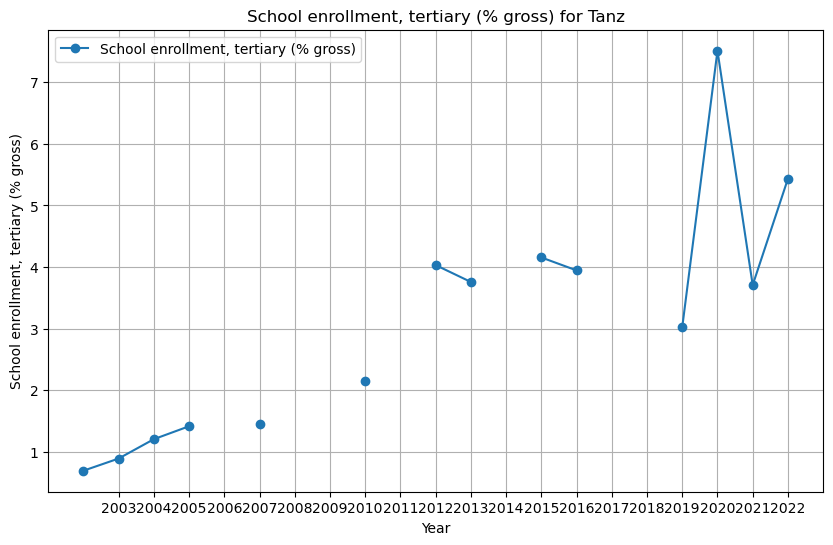

In [23]:
visualize_indicator_with_gaps(df_tanzania, 'School enrollment, tertiary (% gross)', 'Tanz')


In [24]:
imputation_methods_int_tanz = {
    2022: 'mean'
}

df_tanzania['Individuals using the Internet (% of population)'] = apply_custom_imputation(
    df_tanzania, 
    'Individuals using the Internet (% of population)', 
    imputation_methods_int_tanz
)

In [25]:
imputation_methods_school_tanz = {

    2006: 'poly',
    2008: 'poly',
    2009: 'poly',
    2011: 'poly',
    2014: 'poly',
    2017: 'poly',
    2018: 'poly',



}

df_tanzania['School enrollment, tertiary (% gross)'] = apply_custom_imputation(
    df_tanzania, 
    'School enrollment, tertiary (% gross)', 
    imputation_methods_school_tanz
)

In [26]:
check_missing_values('df_tanzania')

print('-------------------------------------')

show_missing_values('df_tanzania')

Missing values for df_tanzania:
                                                    Missing Values  Percentage
Country Name                                                     0         0.0
Time                                                             0         0.0
Exports of goods and services (% of GDP)                         0         0.0
Foreign direct investment, net inflows (% of GDP)                0         0.0
GDP (current US$)                                                0         0.0
GDP growth (annual %)                                            0         0.0
GDP per capita (current US$)                                     0         0.0
GDP per capita growth (annual %)                                 0         0.0
Inflation, GDP deflator (annual %)                               0         0.0
Trade (% of GDP)                                                 0         0.0
Imports of goods and services (% of GDP)                         0         0.0
Gross capital format

# MOROCCO

In [27]:
check_missing_values('df_morocco')

print('-------------------------------------')

show_missing_values('df_morocco')

Missing values for df_morocco:
                                                    Missing Values  Percentage
Country Name                                                     0    0.000000
Time                                                             0    0.000000
Exports of goods and services (% of GDP)                         0    0.000000
Foreign direct investment, net inflows (% of GDP)                0    0.000000
GDP (current US$)                                                0    0.000000
GDP growth (annual %)                                            0    0.000000
GDP per capita (current US$)                                     0    0.000000
GDP per capita growth (annual %)                                 0    0.000000
Inflation, GDP deflator (annual %)                               0    0.000000
Trade (% of GDP)                                                 0    0.000000
Imports of goods and services (% of GDP)                         0    0.000000
Gross capital formati

In [28]:
imputation_methods_int_mor = {
    2022: 'mean'
}

df_morocco['Individuals using the Internet (% of population)'] = apply_custom_imputation(
    df_morocco, 
    'Individuals using the Internet (% of population)', 
    imputation_methods_int_mor
)

In [29]:
imputation_methods_mob_mor = {
    2022: 'mean'
}

df_morocco['Mobile cellular subscriptions (per 100 people)'] = apply_custom_imputation(
    df_morocco, 
    'Mobile cellular subscriptions (per 100 people)', 
    imputation_methods_mob_mor
)

In [30]:
check_missing_values('df_morocco')

print('-------------------------------------')

show_missing_values('df_morocco')

Missing values for df_morocco:
                                                    Missing Values  Percentage
Country Name                                                     0         0.0
Time                                                             0         0.0
Exports of goods and services (% of GDP)                         0         0.0
Foreign direct investment, net inflows (% of GDP)                0         0.0
GDP (current US$)                                                0         0.0
GDP growth (annual %)                                            0         0.0
GDP per capita (current US$)                                     0         0.0
GDP per capita growth (annual %)                                 0         0.0
Inflation, GDP deflator (annual %)                               0         0.0
Trade (% of GDP)                                                 0         0.0
Imports of goods and services (% of GDP)                         0         0.0
Gross capital formati

# CAMEROON/

In [31]:
check_missing_values('df_cameroon')

print('-------------------------------------')

show_missing_values('df_cameroon')

Missing values for df_cameroon:
                                                    Missing Values  Percentage
Country Name                                                     0    0.000000
Time                                                             0    0.000000
Exports of goods and services (% of GDP)                         0    0.000000
Foreign direct investment, net inflows (% of GDP)                0    0.000000
GDP (current US$)                                                0    0.000000
GDP growth (annual %)                                            0    0.000000
GDP per capita (current US$)                                     0    0.000000
GDP per capita growth (annual %)                                 0    0.000000
Inflation, GDP deflator (annual %)                               0    0.000000
Trade (% of GDP)                                                 0    0.000000
Imports of goods and services (% of GDP)                         0    0.000000
Gross capital format

In [32]:
imputation_methods_int_cam = {
    2022: 'mean'
}

df_cameroon['Individuals using the Internet (% of population)'] = apply_custom_imputation(
    df_cameroon, 
    'Individuals using the Internet (% of population)', 
    imputation_methods_int_cam
)

In [33]:
imputation_methods_school_cam = {

    2019: 'mean',
    2020: 'mean',
    2021: 'mean',
    2022: 'mean',



}

df_cameroon['School enrollment, tertiary (% gross)'] = apply_custom_imputation(
    df_cameroon, 
    'School enrollment, tertiary (% gross)', 
    imputation_methods_school_cam
)

In [34]:
check_missing_values('df_cameroon')

print('-------------------------------------')

show_missing_values('df_cameroon')

Missing values for df_cameroon:
                                                    Missing Values  Percentage
Country Name                                                     0         0.0
Time                                                             0         0.0
Exports of goods and services (% of GDP)                         0         0.0
Foreign direct investment, net inflows (% of GDP)                0         0.0
GDP (current US$)                                                0         0.0
GDP growth (annual %)                                            0         0.0
GDP per capita (current US$)                                     0         0.0
GDP per capita growth (annual %)                                 0         0.0
Inflation, GDP deflator (annual %)                               0         0.0
Trade (% of GDP)                                                 0         0.0
Imports of goods and services (% of GDP)                         0         0.0
Gross capital format

# SENEGAL

In [35]:
check_missing_values('df_senegal')

print('-------------------------------------')

show_missing_values('df_senegal')

Missing values for df_senegal:
                                                    Missing Values  Percentage
Country Name                                                     0    0.000000
Time                                                             0    0.000000
Exports of goods and services (% of GDP)                         0    0.000000
Foreign direct investment, net inflows (% of GDP)                0    0.000000
GDP (current US$)                                                0    0.000000
GDP growth (annual %)                                            0    0.000000
GDP per capita (current US$)                                     0    0.000000
GDP per capita growth (annual %)                                 0    0.000000
Inflation, GDP deflator (annual %)                               0    0.000000
Trade (% of GDP)                                                 0    0.000000
Imports of goods and services (% of GDP)                         0    0.000000
Gross capital formati

In [36]:
imputation_methods_int_sen = {
    2022: 'mean'
}

df_senegal['Individuals using the Internet (% of population)'] = apply_custom_imputation(
    df_senegal, 
    'Individuals using the Internet (% of population)', 
    imputation_methods_int_sen
)

In [37]:
imputation_methods_school_sen = {

    2002: 'mean',
    2003: 'mean',




}

df_senegal['School enrollment, tertiary (% gross)'] = apply_custom_imputation(
    df_senegal, 
    'School enrollment, tertiary (% gross)', 
    imputation_methods_school_sen
)

In [38]:
check_missing_values('df_senegal')

print('-------------------------------------')

show_missing_values('df_senegal')

Missing values for df_senegal:
                                                    Missing Values  Percentage
Country Name                                                     0         0.0
Time                                                             0         0.0
Exports of goods and services (% of GDP)                         0         0.0
Foreign direct investment, net inflows (% of GDP)                0         0.0
GDP (current US$)                                                0         0.0
GDP growth (annual %)                                            0         0.0
GDP per capita (current US$)                                     0         0.0
GDP per capita growth (annual %)                                 0         0.0
Inflation, GDP deflator (annual %)                               0         0.0
Trade (% of GDP)                                                 0         0.0
Imports of goods and services (% of GDP)                         0         0.0
Gross capital formati

# CDR

In [39]:
check_missing_values('df_congodemrep')

print('-------------------------------------')

show_missing_values('df_congodemrep')

Missing values for df_congodemrep:
                                                    Missing Values  Percentage
Country Name                                                     0    0.000000
Time                                                             0    0.000000
Exports of goods and services (% of GDP)                         0    0.000000
Foreign direct investment, net inflows (% of GDP)                0    0.000000
GDP (current US$)                                                0    0.000000
GDP growth (annual %)                                            0    0.000000
GDP per capita (current US$)                                     0    0.000000
GDP per capita growth (annual %)                                 0    0.000000
Inflation, GDP deflator (annual %)                               0    0.000000
Trade (% of GDP)                                                 0    0.000000
Imports of goods and services (% of GDP)                         0    0.000000
Gross capital for

In [40]:
imputation_methods_int_cdr = {
    2022: 'mean'
}

df_congodemrep['Individuals using the Internet (% of population)'] = apply_custom_imputation(
    df_congodemrep, 
    'Individuals using the Internet (% of population)', 
    imputation_methods_int_cdr
)

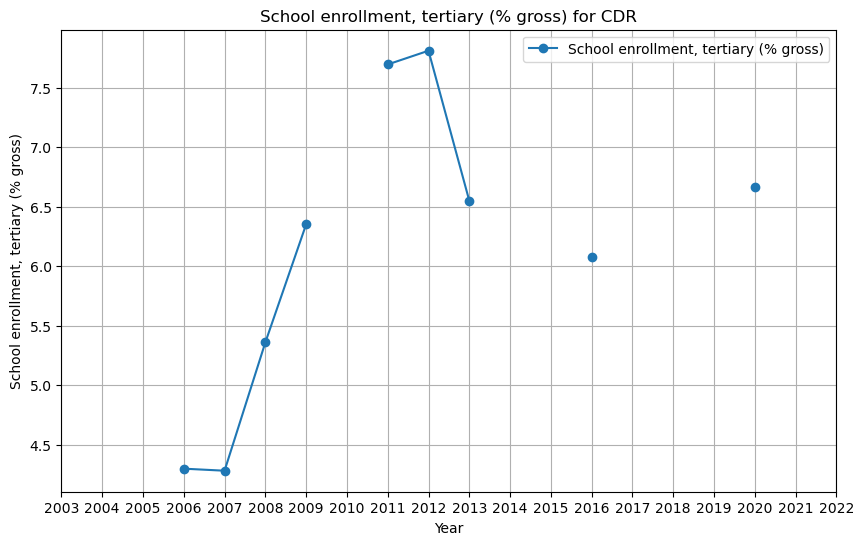

In [41]:
visualize_indicator_with_gaps(df_congodemrep, 'School enrollment, tertiary (% gross)', 'CDR')


In [42]:
imputation_methods_school_cdr = {

    2002: 'mean',
    2003: 'mean',
    2004: 'mean',
    2005: 'mean',
    2010: 'poly',
    2014: 'poly',
    2015: 'poly',
    2017: 'poly',
    2018: 'poly',
    2019: 'poly',
    2021: 'mean',
    2022: 'mean',


}

df_congodemrep['School enrollment, tertiary (% gross)'] = apply_custom_imputation(
    df_congodemrep, 
    'School enrollment, tertiary (% gross)', 
    imputation_methods_school_cdr
)

In [43]:
check_missing_values('df_congodemrep')

print('-------------------------------------')

show_missing_values('df_congodemrep')

Missing values for df_congodemrep:
                                                    Missing Values  Percentage
Country Name                                                     0         0.0
Time                                                             0         0.0
Exports of goods and services (% of GDP)                         0         0.0
Foreign direct investment, net inflows (% of GDP)                0         0.0
GDP (current US$)                                                0         0.0
GDP growth (annual %)                                            0         0.0
GDP per capita (current US$)                                     0         0.0
GDP per capita growth (annual %)                                 0         0.0
Inflation, GDP deflator (annual %)                               0         0.0
Trade (% of GDP)                                                 0         0.0
Imports of goods and services (% of GDP)                         0         0.0
Gross capital for

# ALGERIA

In [44]:
check_missing_values('df_algeria')

print('-------------------------------------')

show_missing_values('df_algeria')

Missing values for df_algeria:
                                                    Missing Values  Percentage
Country Name                                                     0    0.000000
Time                                                             0    0.000000
Exports of goods and services (% of GDP)                         0    0.000000
Foreign direct investment, net inflows (% of GDP)                0    0.000000
GDP (current US$)                                                0    0.000000
GDP growth (annual %)                                            0    0.000000
GDP per capita (current US$)                                     0    0.000000
GDP per capita growth (annual %)                                 0    0.000000
Inflation, GDP deflator (annual %)                               0    0.000000
Trade (% of GDP)                                                 0    0.000000
Imports of goods and services (% of GDP)                         0    0.000000
Gross capital formati

In [45]:
imputation_methods_int_alg = {
    2022: 'mean'
}

df_algeria['Individuals using the Internet (% of population)'] = apply_custom_imputation(
    df_algeria, 
    'Individuals using the Internet (% of population)', 
    imputation_methods_int_alg
)

In [46]:
imputation_methods_school_alg = {

    2008: 'poly',



}

df_algeria['School enrollment, tertiary (% gross)'] = apply_custom_imputation(
    df_algeria, 
    'School enrollment, tertiary (% gross)', 
    imputation_methods_school_alg
)

In [47]:
check_missing_values('df_algeria')

print('-------------------------------------')

show_missing_values('df_algeria')

Missing values for df_algeria:
                                                    Missing Values  Percentage
Country Name                                                     0         0.0
Time                                                             0         0.0
Exports of goods and services (% of GDP)                         0         0.0
Foreign direct investment, net inflows (% of GDP)                0         0.0
GDP (current US$)                                                0         0.0
GDP growth (annual %)                                            0         0.0
GDP per capita (current US$)                                     0         0.0
GDP per capita growth (annual %)                                 0         0.0
Inflation, GDP deflator (annual %)                               0         0.0
Trade (% of GDP)                                                 0         0.0
Imports of goods and services (% of GDP)                         0         0.0
Gross capital formati

# MADAGASCAR

In [48]:
check_missing_values('df_madagascar')

print('-------------------------------------')

show_missing_values('df_madagascar')

Missing values for df_madagascar:
                                                    Missing Values  Percentage
Country Name                                                     0    0.000000
Time                                                             0    0.000000
Exports of goods and services (% of GDP)                         0    0.000000
Foreign direct investment, net inflows (% of GDP)                0    0.000000
GDP (current US$)                                                0    0.000000
GDP growth (annual %)                                            0    0.000000
GDP per capita (current US$)                                     0    0.000000
GDP per capita growth (annual %)                                 0    0.000000
Inflation, GDP deflator (annual %)                               0    0.000000
Trade (% of GDP)                                                 0    0.000000
Imports of goods and services (% of GDP)                         0    0.000000
Gross capital form

In [49]:
imputation_methods_int_mad = {
    2022: 'mean'
}

df_madagascar['Individuals using the Internet (% of population)'] = apply_custom_imputation(
    df_madagascar, 
    'Individuals using the Internet (% of population)', 
    imputation_methods_int_mad
)

In [50]:
check_missing_values('df_madagascar')

print('-------------------------------------')

show_missing_values('df_madagascar')

Missing values for df_madagascar:
                                                    Missing Values  Percentage
Country Name                                                     0         0.0
Time                                                             0         0.0
Exports of goods and services (% of GDP)                         0         0.0
Foreign direct investment, net inflows (% of GDP)                0         0.0
GDP (current US$)                                                0         0.0
GDP growth (annual %)                                            0         0.0
GDP per capita (current US$)                                     0         0.0
GDP per capita growth (annual %)                                 0         0.0
Inflation, GDP deflator (annual %)                               0         0.0
Trade (% of GDP)                                                 0         0.0
Imports of goods and services (% of GDP)                         0         0.0
Gross capital form

# GUNIEA

In [51]:
check_missing_values('df_guinea')

print('-------------------------------------')

show_missing_values('df_guinea')

Missing values for df_guinea:
                                                    Missing Values  Percentage
Country Name                                                     0    0.000000
Time                                                             0    0.000000
Exports of goods and services (% of GDP)                         0    0.000000
Foreign direct investment, net inflows (% of GDP)                1    4.761905
GDP (current US$)                                                0    0.000000
GDP growth (annual %)                                            0    0.000000
GDP per capita (current US$)                                     0    0.000000
GDP per capita growth (annual %)                                 0    0.000000
Inflation, GDP deflator (annual %)                               0    0.000000
Trade (% of GDP)                                                 0    0.000000
Imports of goods and services (% of GDP)                         0    0.000000
Gross capital formatio

In [52]:
imputation_methods_int_guin = {
    2022: 'mean'
}

df_guinea['Individuals using the Internet (% of population)'] = apply_custom_imputation(
    df_guinea, 
    'Individuals using the Internet (% of population)', 
    imputation_methods_int_guin
)

In [53]:
imputation_methods_school_guin = {

    2002: 'mean',
    2003: 'mean',
    2022: 'mean',




}

df_guinea['School enrollment, tertiary (% gross)'] = apply_custom_imputation(
    df_guinea, 
    'School enrollment, tertiary (% gross)', 
    imputation_methods_school_guin
)

In [54]:
imputation_methods_fdi_guin = {

    2010: 'poly',
    




}

df_guinea['Foreign direct investment, net inflows (% of GDP)'] = apply_custom_imputation(
    df_guinea, 
    'Foreign direct investment, net inflows (% of GDP)', 
    imputation_methods_fdi_guin
)

In [55]:
imputation_methods_gcf_guin = {

    2002: 'mean',
    2003: 'mean',
    2004: 'mean',
    2005: 'mean',
    2006: 'mean',




}

df_guinea['Gross capital formation (annual % growth)'] = apply_custom_imputation(
    df_guinea, 
    'Gross capital formation (annual % growth)', 
    imputation_methods_gcf_guin
)

In [56]:
imputation_methods_mcp_guin = {

    2006: 'poly',
    2022: 'mean',




}

df_guinea['Mobile cellular subscriptions (per 100 people)'] = apply_custom_imputation(
    df_guinea, 
    'Mobile cellular subscriptions (per 100 people)', 
    imputation_methods_mcp_guin
)

In [57]:
imputation_methods_mob_guin = {

    2006: 'poly',
    2022: 'mean',




}

df_guinea['Mobile cellular subscriptions'] = apply_custom_imputation(
    df_guinea, 
    'Mobile cellular subscriptions', 
    imputation_methods_mob_guin
)

In [58]:
check_missing_values('df_guinea')

print('-------------------------------------')

show_missing_values('df_guinea')

Missing values for df_guinea:
                                                    Missing Values  Percentage
Country Name                                                     0         0.0
Time                                                             0         0.0
Exports of goods and services (% of GDP)                         0         0.0
Foreign direct investment, net inflows (% of GDP)                0         0.0
GDP (current US$)                                                0         0.0
GDP growth (annual %)                                            0         0.0
GDP per capita (current US$)                                     0         0.0
GDP per capita growth (annual %)                                 0         0.0
Inflation, GDP deflator (annual %)                               0         0.0
Trade (% of GDP)                                                 0         0.0
Imports of goods and services (% of GDP)                         0         0.0
Gross capital formatio

# RWANDA

In [59]:
check_missing_values('df_rwanda')

print('-------------------------------------')

show_missing_values('df_rwanda')

Missing values for df_rwanda:
                                                    Missing Values  Percentage
Country Name                                                     0     0.00000
Time                                                             0     0.00000
Exports of goods and services (% of GDP)                         0     0.00000
Foreign direct investment, net inflows (% of GDP)                0     0.00000
GDP (current US$)                                                0     0.00000
GDP growth (annual %)                                            0     0.00000
GDP per capita (current US$)                                     0     0.00000
GDP per capita growth (annual %)                                 0     0.00000
Inflation, GDP deflator (annual %)                               0     0.00000
Trade (% of GDP)                                                 0     0.00000
Imports of goods and services (% of GDP)                         0     0.00000
Gross capital formatio

In [60]:
imputation_methods_int_rwd = {
    
    2006: 'poly',
    2022: 'mean',
}

df_rwanda['Individuals using the Internet (% of population)'] = apply_custom_imputation(
    df_rwanda, 
    'Individuals using the Internet (% of population)', 
    imputation_methods_int_rwd
)

In [61]:
check_missing_values('df_rwanda')

print('-------------------------------------')

show_missing_values('df_rwanda')

Missing values for df_rwanda:
                                                    Missing Values  Percentage
Country Name                                                     0         0.0
Time                                                             0         0.0
Exports of goods and services (% of GDP)                         0         0.0
Foreign direct investment, net inflows (% of GDP)                0         0.0
GDP (current US$)                                                0         0.0
GDP growth (annual %)                                            0         0.0
GDP per capita (current US$)                                     0         0.0
GDP per capita growth (annual %)                                 0         0.0
Inflation, GDP deflator (annual %)                               0         0.0
Trade (% of GDP)                                                 0         0.0
Imports of goods and services (% of GDP)                         0         0.0
Gross capital formatio

# BENIN

In [62]:
check_missing_values('df_benin')

print('-------------------------------------')

show_missing_values('df_benin')

Missing values for df_benin:
                                                    Missing Values  Percentage
Country Name                                                     0    0.000000
Time                                                             0    0.000000
Exports of goods and services (% of GDP)                         0    0.000000
Foreign direct investment, net inflows (% of GDP)                0    0.000000
GDP (current US$)                                                0    0.000000
GDP growth (annual %)                                            0    0.000000
GDP per capita (current US$)                                     0    0.000000
GDP per capita growth (annual %)                                 0    0.000000
Inflation, GDP deflator (annual %)                               0    0.000000
Trade (% of GDP)                                                 0    0.000000
Imports of goods and services (% of GDP)                         0    0.000000
Gross capital formation

In [63]:
imputation_methods_int_ben = {
    
   
    2022: 'mean',
}

df_benin['Individuals using the Internet (% of population)'] = apply_custom_imputation(
    df_benin, 
    'Individuals using the Internet (% of population)', 
    imputation_methods_int_ben
)

In [64]:
imputation_methods_school_ben = {
    
   
    2022: 'mean',
}

df_benin['School enrollment, tertiary (% gross)'] = apply_custom_imputation(
    df_benin, 
    'School enrollment, tertiary (% gross)', 
    imputation_methods_school_ben
)

In [65]:
check_missing_values('df_benin')

print('-------------------------------------')

show_missing_values('df_benin')

Missing values for df_benin:
                                                    Missing Values  Percentage
Country Name                                                     0         0.0
Time                                                             0         0.0
Exports of goods and services (% of GDP)                         0         0.0
Foreign direct investment, net inflows (% of GDP)                0         0.0
GDP (current US$)                                                0         0.0
GDP growth (annual %)                                            0         0.0
GDP per capita (current US$)                                     0         0.0
GDP per capita growth (annual %)                                 0         0.0
Inflation, GDP deflator (annual %)                               0         0.0
Trade (% of GDP)                                                 0         0.0
Imports of goods and services (% of GDP)                         0         0.0
Gross capital formation

# BURUNDI

In [66]:
check_missing_values('df_burundi')

print('-------------------------------------')

show_missing_values('df_burundi')

Missing values for df_burundi:
                                                    Missing Values  Percentage
Country Name                                                     0    0.000000
Time                                                             0    0.000000
Exports of goods and services (% of GDP)                         0    0.000000
Foreign direct investment, net inflows (% of GDP)                2    9.523810
GDP (current US$)                                                0    0.000000
GDP growth (annual %)                                            0    0.000000
GDP per capita (current US$)                                     0    0.000000
GDP per capita growth (annual %)                                 0    0.000000
Inflation, GDP deflator (annual %)                               0    0.000000
Trade (% of GDP)                                                 0    0.000000
Imports of goods and services (% of GDP)                         0    0.000000
Gross capital formati

In [67]:
imputation_methods_fdi_bur = {

    2002: 'mean',
    2003: 'mean',
    




}

df_burundi['Foreign direct investment, net inflows (% of GDP)'] = apply_custom_imputation(
    df_burundi, 
    'Foreign direct investment, net inflows (% of GDP)', 
    imputation_methods_fdi_bur
)

In [68]:
imputation_methods_int_bur = {
    
   
    2022: 'mean',
}

df_burundi['Individuals using the Internet (% of population)'] = apply_custom_imputation(
    df_burundi, 
    'Individuals using the Internet (% of population)', 
    imputation_methods_int_bur
)

In [69]:
imputation_methods_school_bur = {
    
    2003: 'poly',
    2011: 'poly',
    2019: 'poly',
    2020: 'poly',
   
}

df_burundi['School enrollment, tertiary (% gross)'] = apply_custom_imputation(
    df_burundi, 
    'School enrollment, tertiary (% gross)', 
    imputation_methods_school_bur
)

In [70]:
check_missing_values('df_burundi')

print('-------------------------------------')

show_missing_values('df_burundi')

Missing values for df_burundi:
                                                    Missing Values  Percentage
Country Name                                                     0         0.0
Time                                                             0         0.0
Exports of goods and services (% of GDP)                         0         0.0
Foreign direct investment, net inflows (% of GDP)                0         0.0
GDP (current US$)                                                0         0.0
GDP growth (annual %)                                            0         0.0
GDP per capita (current US$)                                     0         0.0
GDP per capita growth (annual %)                                 0         0.0
Inflation, GDP deflator (annual %)                               0         0.0
Trade (% of GDP)                                                 0         0.0
Imports of goods and services (% of GDP)                         0         0.0
Gross capital formati

# TOGO

In [71]:
check_missing_values('df_togo')

print('-------------------------------------')

show_missing_values('df_togo')

Missing values for df_togo:
                                                    Missing Values  Percentage
Country Name                                                     0    0.000000
Time                                                             0    0.000000
Exports of goods and services (% of GDP)                         0    0.000000
Foreign direct investment, net inflows (% of GDP)                0    0.000000
GDP (current US$)                                                0    0.000000
GDP growth (annual %)                                            0    0.000000
GDP per capita (current US$)                                     0    0.000000
GDP per capita growth (annual %)                                 0    0.000000
Inflation, GDP deflator (annual %)                               0    0.000000
Trade (% of GDP)                                                 0    0.000000
Imports of goods and services (% of GDP)                         0    0.000000
Gross capital formation 

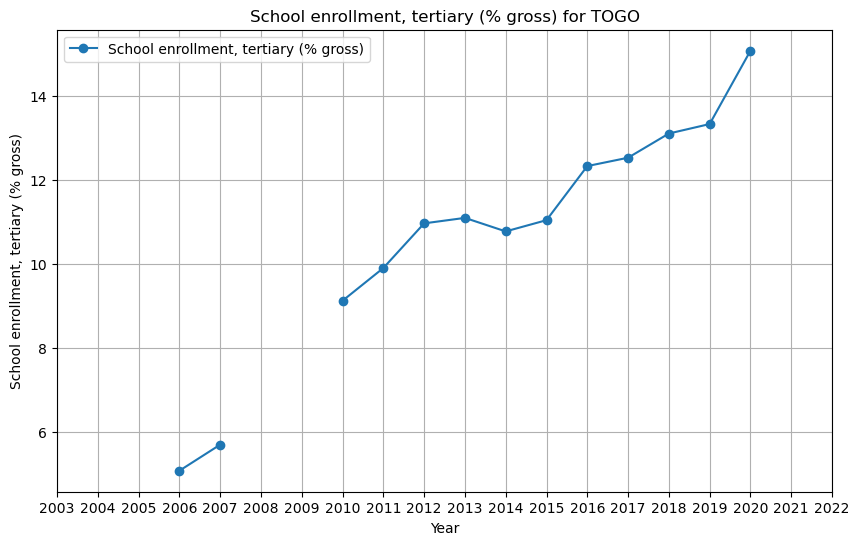

In [72]:
visualize_indicator_with_gaps(df_togo, 'School enrollment, tertiary (% gross)', 'TOGO')


In [73]:
imputation_methods_school_togo = {
    
    2002: 'mean',
    2003: 'mean',
    2004: 'mean',
    2005: 'mean',
    2008: 'poly',
    2009: 'poly',
    2021: 'mean',
    2022: 'mean',

   
}

df_togo['School enrollment, tertiary (% gross)'] = apply_custom_imputation(
    df_togo, 
    'School enrollment, tertiary (% gross)', 
    imputation_methods_school_togo
)

In [74]:
imputation_methods_int_togo = {
    
   
    2022: 'mean',
}

df_togo['Individuals using the Internet (% of population)'] = apply_custom_imputation(
    df_togo, 
    'Individuals using the Internet (% of population)', 
    imputation_methods_int_togo
)

In [75]:
check_missing_values('df_togo')

print('-------------------------------------')

show_missing_values('df_togo')

Missing values for df_togo:
                                                    Missing Values  Percentage
Country Name                                                     0         0.0
Time                                                             0         0.0
Exports of goods and services (% of GDP)                         0         0.0
Foreign direct investment, net inflows (% of GDP)                0         0.0
GDP (current US$)                                                0         0.0
GDP growth (annual %)                                            0         0.0
GDP per capita (current US$)                                     0         0.0
GDP per capita growth (annual %)                                 0         0.0
Inflation, GDP deflator (annual %)                               0         0.0
Trade (% of GDP)                                                 0         0.0
Imports of goods and services (% of GDP)                         0         0.0
Gross capital formation 

# MAURITANIA

In [76]:
check_missing_values('df_mauritania')

print('-------------------------------------')

show_missing_values('df_mauritania')

Missing values for df_mauritania:
                                                    Missing Values  Percentage
Country Name                                                     0    0.000000
Time                                                             0    0.000000
Exports of goods and services (% of GDP)                         0    0.000000
Foreign direct investment, net inflows (% of GDP)                0    0.000000
GDP (current US$)                                                0    0.000000
GDP growth (annual %)                                            0    0.000000
GDP per capita (current US$)                                     0    0.000000
GDP per capita growth (annual %)                                 0    0.000000
Inflation, GDP deflator (annual %)                               0    0.000000
Trade (% of GDP)                                                 0    0.000000
Imports of goods and services (% of GDP)                         0    0.000000
Gross capital form

In [77]:
imputation_methods_school_mtn = {

    2014: 'poly',
    2021: 'mean',
    2022: 'mean',

   
}

df_mauritania['School enrollment, tertiary (% gross)'] = apply_custom_imputation(
    df_mauritania, 
    'School enrollment, tertiary (% gross)', 
    imputation_methods_school_mtn
)

In [78]:
imputation_methods_int_mtn = {
    
   
    2022: 'mean',
}

df_mauritania['Individuals using the Internet (% of population)'] = apply_custom_imputation(
    df_mauritania, 
    'Individuals using the Internet (% of population)', 
    imputation_methods_int_mtn
)

In [79]:
check_missing_values('df_mauritania')

print('-------------------------------------')

show_missing_values('df_mauritania')

Missing values for df_mauritania:
                                                    Missing Values  Percentage
Country Name                                                     0         0.0
Time                                                             0         0.0
Exports of goods and services (% of GDP)                         0         0.0
Foreign direct investment, net inflows (% of GDP)                0         0.0
GDP (current US$)                                                0         0.0
GDP growth (annual %)                                            0         0.0
GDP per capita (current US$)                                     0         0.0
GDP per capita growth (annual %)                                 0         0.0
Inflation, GDP deflator (annual %)                               0         0.0
Trade (% of GDP)                                                 0         0.0
Imports of goods and services (% of GDP)                         0         0.0
Gross capital form

# BOTSWANA

In [80]:
check_missing_values('df_botswana')

print('-------------------------------------')

show_missing_values('df_botswana')

Missing values for df_botswana:
                                                    Missing Values  Percentage
Country Name                                                     0    0.000000
Time                                                             0    0.000000
Exports of goods and services (% of GDP)                         0    0.000000
Foreign direct investment, net inflows (% of GDP)                0    0.000000
GDP (current US$)                                                0    0.000000
GDP growth (annual %)                                            0    0.000000
GDP per capita (current US$)                                     0    0.000000
GDP per capita growth (annual %)                                 0    0.000000
Inflation, GDP deflator (annual %)                               0    0.000000
Trade (% of GDP)                                                 0    0.000000
Imports of goods and services (% of GDP)                         0    0.000000
Gross capital format

In [81]:
imputation_methods_int_bot = {
    
   
    2022: 'mean',
}

df_botswana['Individuals using the Internet (% of population)'] = apply_custom_imputation(
    df_botswana, 
    'Individuals using the Internet (% of population)', 
    imputation_methods_int_bot
)

In [82]:
imputation_methods_school_bot = {

    2018: 'poly',

    2022: 'mean',

   
}

df_botswana['School enrollment, tertiary (% gross)'] = apply_custom_imputation(
    df_botswana, 
    'School enrollment, tertiary (% gross)', 
    imputation_methods_school_bot
)

In [83]:
check_missing_values('df_botswana')

print('-------------------------------------')

show_missing_values('df_botswana')

Missing values for df_botswana:
                                                    Missing Values  Percentage
Country Name                                                     0         0.0
Time                                                             0         0.0
Exports of goods and services (% of GDP)                         0         0.0
Foreign direct investment, net inflows (% of GDP)                0         0.0
GDP (current US$)                                                0         0.0
GDP growth (annual %)                                            0         0.0
GDP per capita (current US$)                                     0         0.0
GDP per capita growth (annual %)                                 0         0.0
Inflation, GDP deflator (annual %)                               0         0.0
Trade (% of GDP)                                                 0         0.0
Imports of goods and services (% of GDP)                         0         0.0
Gross capital format

# NAMIBIA

In [84]:
check_missing_values('df_namibia')

print('-------------------------------------')

show_missing_values('df_namibia')

Missing values for df_namibia:
                                                    Missing Values  Percentage
Country Name                                                     0    0.000000
Time                                                             0    0.000000
Exports of goods and services (% of GDP)                         0    0.000000
Foreign direct investment, net inflows (% of GDP)                0    0.000000
GDP (current US$)                                                0    0.000000
GDP growth (annual %)                                            0    0.000000
GDP per capita (current US$)                                     0    0.000000
GDP per capita growth (annual %)                                 0    0.000000
Inflation, GDP deflator (annual %)                               0    0.000000
Trade (% of GDP)                                                 0    0.000000
Imports of goods and services (% of GDP)                         0    0.000000
Gross capital formati

In [85]:
imputation_methods_int_nam = {
    
   
    2022: 'mean',
}

df_namibia['Individuals using the Internet (% of population)'] = apply_custom_imputation(
    df_namibia, 
    'Individuals using the Internet (% of population)', 
    imputation_methods_int_nam
)

In [86]:
imputation_methods_school_nam = {

    2004: 'poly',
    2007: 'poly',
    2009: 'poly',
    2010: 'poly',
    2011: 'poly',
    2021: 'mean',
    2022: 'mean',

   
}

df_namibia['School enrollment, tertiary (% gross)'] = apply_custom_imputation(
    df_namibia, 
    'School enrollment, tertiary (% gross)', 
    imputation_methods_school_nam
)

In [87]:
check_missing_values('df_namibia')

print('-------------------------------------')

show_missing_values('df_namibia')

Missing values for df_namibia:
                                                    Missing Values  Percentage
Country Name                                                     0         0.0
Time                                                             0         0.0
Exports of goods and services (% of GDP)                         0         0.0
Foreign direct investment, net inflows (% of GDP)                0         0.0
GDP (current US$)                                                0         0.0
GDP growth (annual %)                                            0         0.0
GDP per capita (current US$)                                     0         0.0
GDP per capita growth (annual %)                                 0         0.0
Inflation, GDP deflator (annual %)                               0         0.0
Trade (% of GDP)                                                 0         0.0
Imports of goods and services (% of GDP)                         0         0.0
Gross capital formati

# MAURITIUS

In [88]:
check_missing_values('df_mauritius')

print('-------------------------------------')

show_missing_values('df_mauritius')

Missing values for df_mauritius:
                                                    Missing Values  Percentage
Country Name                                                     0    0.000000
Time                                                             0    0.000000
Exports of goods and services (% of GDP)                         0    0.000000
Foreign direct investment, net inflows (% of GDP)                0    0.000000
GDP (current US$)                                                0    0.000000
GDP growth (annual %)                                            0    0.000000
GDP per capita (current US$)                                     0    0.000000
GDP per capita growth (annual %)                                 0    0.000000
Inflation, GDP deflator (annual %)                               0    0.000000
Trade (% of GDP)                                                 0    0.000000
Imports of goods and services (% of GDP)                         0    0.000000
Gross capital forma

In [89]:
imputation_methods_int_mas = {
    
   
    2022: 'mean',
}

df_mauritius['Individuals using the Internet (% of population)'] = apply_custom_imputation(
    df_mauritius, 
    'Individuals using the Internet (% of population)', 
    imputation_methods_int_mas
)

In [90]:
imputation_methods_gcf_mas = {
    
    2002: 'mean',
    2003: 'mean',
    2004: 'mean',
    2005: 'mean',
    2006: 'mean',
}

df_mauritius['Gross capital formation (annual % growth)'] = apply_custom_imputation(
    df_mauritius, 
    'Gross capital formation (annual % growth)', 
    imputation_methods_gcf_mas
)

In [91]:
check_missing_values('df_mauritius')

print('-------------------------------------')

show_missing_values('df_mauritius')

Missing values for df_mauritius:
                                                    Missing Values  Percentage
Country Name                                                     0         0.0
Time                                                             0         0.0
Exports of goods and services (% of GDP)                         0         0.0
Foreign direct investment, net inflows (% of GDP)                0         0.0
GDP (current US$)                                                0         0.0
GDP growth (annual %)                                            0         0.0
GDP per capita (current US$)                                     0         0.0
GDP per capita growth (annual %)                                 0         0.0
Inflation, GDP deflator (annual %)                               0         0.0
Trade (% of GDP)                                                 0         0.0
Imports of goods and services (% of GDP)                         0         0.0
Gross capital forma

# KENYA

In [92]:
check_missing_values('df_kenya')

print('-------------------------------------')

show_missing_values('df_kenya')

Missing values for df_kenya:
                                                    Missing Values  Percentage
Country Name                                                     0    0.000000
Time                                                             0    0.000000
Exports of goods and services (% of GDP)                         0    0.000000
Foreign direct investment, net inflows (% of GDP)                0    0.000000
GDP (current US$)                                                0    0.000000
GDP growth (annual %)                                            0    0.000000
GDP per capita (current US$)                                     0    0.000000
GDP per capita growth (annual %)                                 0    0.000000
Inflation, GDP deflator (annual %)                               0    0.000000
Trade (% of GDP)                                                 0    0.000000
Imports of goods and services (% of GDP)                         0    0.000000
Gross capital formation

In [93]:
imputation_methods_int_ken = {
    
   
    2022: 'mean',
}

df_kenya['Individuals using the Internet (% of population)'] = apply_custom_imputation(
    df_kenya, 
    'Individuals using the Internet (% of population)', 
    imputation_methods_int_ken
)

In [94]:
imputation_methods_school_ken = {

    2003: 'poly',
    2006: 'poly',
    2007: 'poly',
    2008: 'poly',
    2010: 'poly',
    2011: 'poly',
    2012: 'poly',
    2013: 'poly',
    2014: 'poly',

   
}

df_kenya['School enrollment, tertiary (% gross)'] = apply_custom_imputation(
    df_kenya, 
    'School enrollment, tertiary (% gross)', 
    imputation_methods_school_ken
)

In [95]:
imputation_methods_ser_ken = {

    2002: 'mean',
    2003: 'mean',
    2004: 'mean',
    2005: 'mean',
    2006: 'mean',


   
}

df_kenya['Services, value added (annual % growth)'] = apply_custom_imputation(
    df_kenya, 
    'Services, value added (annual % growth)', 
    imputation_methods_ser_ken
)

In [96]:
check_missing_values('df_kenya')

print('-------------------------------------')

show_missing_values('df_kenya')

Missing values for df_kenya:
                                                    Missing Values  Percentage
Country Name                                                     0         0.0
Time                                                             0         0.0
Exports of goods and services (% of GDP)                         0         0.0
Foreign direct investment, net inflows (% of GDP)                0         0.0
GDP (current US$)                                                0         0.0
GDP growth (annual %)                                            0         0.0
GDP per capita (current US$)                                     0         0.0
GDP per capita growth (annual %)                                 0         0.0
Inflation, GDP deflator (annual %)                               0         0.0
Trade (% of GDP)                                                 0         0.0
Imports of goods and services (% of GDP)                         0         0.0
Gross capital formation

# BURKINA FASO

In [97]:
check_missing_values('df_burkinafaso')

print('-------------------------------------')

show_missing_values('df_burkinafaso')

Missing values for df_burkinafaso:
                                                    Missing Values  Percentage
Country Name                                                     0    0.000000
Time                                                             0    0.000000
Exports of goods and services (% of GDP)                         0    0.000000
Foreign direct investment, net inflows (% of GDP)                0    0.000000
GDP (current US$)                                                0    0.000000
GDP growth (annual %)                                            0    0.000000
GDP per capita (current US$)                                     0    0.000000
GDP per capita growth (annual %)                                 0    0.000000
Inflation, GDP deflator (annual %)                               0    0.000000
Trade (% of GDP)                                                 0    0.000000
Imports of goods and services (% of GDP)                         0    0.000000
Gross capital for

In [98]:
imputation_methods_school_bf = {

    2004: 'poly',


   
}

df_burkinafaso['School enrollment, tertiary (% gross)'] = apply_custom_imputation(
    df_burkinafaso, 
    'School enrollment, tertiary (% gross)', 
    imputation_methods_school_bf
)

In [99]:
imputation_methods_int_bf = {

    2022: 'mean',


   
}

df_burkinafaso['Individuals using the Internet (% of population)'] = apply_custom_imputation(
    df_burkinafaso, 
    'Individuals using the Internet (% of population)', 
    imputation_methods_int_bf
)

In [100]:
imputation_methods_mcp_bf = {

    2022: 'mean',


   
}

df_burkinafaso['Mobile cellular subscriptions (per 100 people)'] = apply_custom_imputation(
    df_burkinafaso, 
    'Mobile cellular subscriptions (per 100 people)', 
    imputation_methods_mcp_bf
)

In [101]:
imputation_methods_mob_bf = {

    2022: 'mean',


   
}

df_burkinafaso['Mobile cellular subscriptions'] = apply_custom_imputation(
    df_burkinafaso, 
    'Mobile cellular subscriptions', 
    imputation_methods_mob_bf
)

In [102]:
check_missing_values('df_burkinafaso')

print('-------------------------------------')

show_missing_values('df_burkinafaso')

Missing values for df_burkinafaso:
                                                    Missing Values  Percentage
Country Name                                                     0         0.0
Time                                                             0         0.0
Exports of goods and services (% of GDP)                         0         0.0
Foreign direct investment, net inflows (% of GDP)                0         0.0
GDP (current US$)                                                0         0.0
GDP growth (annual %)                                            0         0.0
GDP per capita (current US$)                                     0         0.0
GDP per capita growth (annual %)                                 0         0.0
Inflation, GDP deflator (annual %)                               0         0.0
Trade (% of GDP)                                                 0         0.0
Imports of goods and services (% of GDP)                         0         0.0
Gross capital for

# Tunisia

In [103]:
check_missing_values('df_tunisia')

print('-------------------------------------')

show_missing_values('df_tunisia')

Missing values for df_tunisia:
                                                    Missing Values  Percentage
Country Name                                                     0    0.000000
Time                                                             0    0.000000
Exports of goods and services (% of GDP)                         0    0.000000
Foreign direct investment, net inflows (% of GDP)                0    0.000000
GDP (current US$)                                                0    0.000000
GDP growth (annual %)                                            0    0.000000
GDP per capita (current US$)                                     0    0.000000
GDP per capita growth (annual %)                                 0    0.000000
Inflation, GDP deflator (annual %)                               0    0.000000
Trade (% of GDP)                                                 0    0.000000
Imports of goods and services (% of GDP)                         0    0.000000
Gross capital formati

In [104]:
imputation_methods_int_tun = {

    2022: 'mean',


   
}

df_tunisia['Individuals using the Internet (% of population)'] = apply_custom_imputation(
    df_tunisia, 
    'Individuals using the Internet (% of population)', 
    imputation_methods_int_tun
)

In [105]:
imputation_methods_indcon_tun = {

    2002: 'mean',
    2003: 'mean',
    2004: 'mean',
    2005: 'mean',
    2006: 'mean',
    2007: 'mean',
    2008: 'mean',
    2009: 'mean',
    2010: 'mean',


   
}

df_tunisia['Industry (including construction), value added (annual % growth)'] = apply_custom_imputation(
    df_tunisia, 
    'Industry (including construction), value added (annual % growth)', 
    imputation_methods_indcon_tun
)

In [106]:
check_missing_values('df_tunisia')

print('-------------------------------------')

show_missing_values('df_tunisia')

Missing values for df_tunisia:
                                                    Missing Values  Percentage
Country Name                                                     0         0.0
Time                                                             0         0.0
Exports of goods and services (% of GDP)                         0         0.0
Foreign direct investment, net inflows (% of GDP)                0         0.0
GDP (current US$)                                                0         0.0
GDP growth (annual %)                                            0         0.0
GDP per capita (current US$)                                     0         0.0
GDP per capita growth (annual %)                                 0         0.0
Inflation, GDP deflator (annual %)                               0         0.0
Trade (% of GDP)                                                 0         0.0
Imports of goods and services (% of GDP)                         0         0.0
Gross capital formati

# Angola

In [107]:
check_missing_values('df_angola')

print('-------------------------------------')

show_missing_values('df_angola')

Missing values for df_angola:
                                                    Missing Values  Percentage
Country Name                                                     0    0.000000
Time                                                             0    0.000000
Exports of goods and services (% of GDP)                         0    0.000000
Foreign direct investment, net inflows (% of GDP)                0    0.000000
GDP (current US$)                                                0    0.000000
GDP growth (annual %)                                            0    0.000000
GDP per capita (current US$)                                     0    0.000000
GDP per capita growth (annual %)                                 0    0.000000
Inflation, GDP deflator (annual %)                               0    0.000000
Trade (% of GDP)                                                 0    0.000000
Imports of goods and services (% of GDP)                         0    0.000000
Gross capital formatio

In [108]:
imputation_methods_gcf_ang = {

    2002: 'mean',

}

df_angola['Gross capital formation (annual % growth)'] = apply_custom_imputation(
    df_angola, 
    'Gross capital formation (annual % growth)', 
    imputation_methods_gcf_ang
)

In [109]:
imputation_methods_agri_ang = {

    2002: 'mean',

}

df_angola['Agriculture, forestry, and fishing, value added (annual % growth)'] = apply_custom_imputation(
    df_angola, 
    'Agriculture, forestry, and fishing, value added (annual % growth)', 
    imputation_methods_agri_ang
)

In [110]:
imputation_methods_indcon_ang = {

    2002: 'mean',

}

df_angola['Industry (including construction), value added (annual % growth)'] = apply_custom_imputation(
    df_angola, 
    'Industry (including construction), value added (annual % growth)', 
    imputation_methods_indcon_ang
)

In [111]:
imputation_methods_ser_ang = {

    2002: 'mean',

}

df_angola['Services, value added (annual % growth)'] = apply_custom_imputation(
    df_angola, 
    'Services, value added (annual % growth)', 
    imputation_methods_ser_ang
)

In [112]:
imputation_methods_int_ang = {

    2022: 'mean',

}

df_angola['Individuals using the Internet (% of population)'] = apply_custom_imputation(
    df_angola, 
    'Individuals using the Internet (% of population)', 
    imputation_methods_int_ang
)

In [113]:
imputation_methods_school_ang = {

    2007: 'poly',
    2008: 'poly',
    2009: 'poly',
    2010: 'poly',
    2012: 'poly',
    2014: 'poly',
    2020: 'mean',
    2021: 'mean',
    2022: 'mean',

}

df_angola['School enrollment, tertiary (% gross)'] = apply_custom_imputation(
    df_angola, 
    'School enrollment, tertiary (% gross)', 
    imputation_methods_school_ang
)

In [114]:
check_missing_values('df_angola')

print('-------------------------------------')

show_missing_values('df_angola')

Missing values for df_angola:
                                                    Missing Values  Percentage
Country Name                                                     0         0.0
Time                                                             0         0.0
Exports of goods and services (% of GDP)                         0         0.0
Foreign direct investment, net inflows (% of GDP)                0         0.0
GDP (current US$)                                                0         0.0
GDP growth (annual %)                                            0         0.0
GDP per capita (current US$)                                     0         0.0
GDP per capita growth (annual %)                                 0         0.0
Inflation, GDP deflator (annual %)                               0         0.0
Trade (% of GDP)                                                 0         0.0
Imports of goods and services (% of GDP)                         0         0.0
Gross capital formatio

# GHANA

In [115]:
check_missing_values('df_ghana')

print('-------------------------------------')

show_missing_values('df_ghana')

Missing values for df_ghana:
                                                    Missing Values  Percentage
Country Name                                                     0    0.000000
Time                                                             0    0.000000
Exports of goods and services (% of GDP)                         0    0.000000
Foreign direct investment, net inflows (% of GDP)                0    0.000000
GDP (current US$)                                                0    0.000000
GDP growth (annual %)                                            0    0.000000
GDP per capita (current US$)                                     0    0.000000
GDP per capita growth (annual %)                                 0    0.000000
Inflation, GDP deflator (annual %)                               0    0.000000
Trade (% of GDP)                                                 0    0.000000
Imports of goods and services (% of GDP)                         0    0.000000
Gross capital formation

In [116]:
imputation_methods_gcf_ghn = {

    2002: 'mean',
    2003: 'mean',
    2004: 'mean',
    2005: 'mean',
    2006: 'mean',

}

df_ghana['Gross capital formation (annual % growth)'] = apply_custom_imputation(
    df_ghana, 
    'Gross capital formation (annual % growth)', 
    imputation_methods_gcf_ghn
)

In [117]:
imputation_methods_agri_ghn = {

    2002: 'mean',
    2003: 'mean',
    2004: 'mean',
    2005: 'mean',
    2006: 'mean',
}

df_ghana['Agriculture, forestry, and fishing, value added (annual % growth)'] = apply_custom_imputation(
    df_ghana, 
    'Agriculture, forestry, and fishing, value added (annual % growth)', 
    imputation_methods_agri_ghn
)

In [118]:
imputation_methods_indcon_ghn = {

    2002: 'mean',
    2003: 'mean',
    2004: 'mean',
    2005: 'mean',
    2006: 'mean',

}

df_ghana['Industry (including construction), value added (annual % growth)'] = apply_custom_imputation(
    df_ghana, 
    'Industry (including construction), value added (annual % growth)', 
    imputation_methods_indcon_ghn
)

In [119]:
imputation_methods_ser_ghn = {

    2002: 'mean',
    2003: 'mean',
    2004: 'mean',
    2005: 'mean',
    2006: 'mean',

}

df_ghana['Services, value added (annual % growth)'] = apply_custom_imputation(
    df_ghana, 
    'Services, value added (annual % growth)', 
    imputation_methods_ser_ghn
)

In [120]:
imputation_methods_int_ghn = {

    2022: 'mean',

}

df_ghana['Individuals using the Internet (% of population)'] = apply_custom_imputation(
    df_ghana, 
    'Individuals using the Internet (% of population)', 
    imputation_methods_int_ghn
)

In [121]:
imputation_methods_school_ghn = {

    2002: 'mean',
    2003: 'mean',
    2004: 'mean',
    2010: 'poly',


}

df_ghana['School enrollment, tertiary (% gross)'] = apply_custom_imputation(
    df_ghana, 
    'School enrollment, tertiary (% gross)', 
    imputation_methods_school_ghn
)

In [122]:
check_missing_values('df_ghana')

print('-------------------------------------')

show_missing_values('df_ghana')

Missing values for df_ghana:
                                                    Missing Values  Percentage
Country Name                                                     0         0.0
Time                                                             0         0.0
Exports of goods and services (% of GDP)                         0         0.0
Foreign direct investment, net inflows (% of GDP)                0         0.0
GDP (current US$)                                                0         0.0
GDP growth (annual %)                                            0         0.0
GDP per capita (current US$)                                     0         0.0
GDP per capita growth (annual %)                                 0         0.0
Inflation, GDP deflator (annual %)                               0         0.0
Trade (% of GDP)                                                 0         0.0
Imports of goods and services (% of GDP)                         0         0.0
Gross capital formation

# SUDAN

In [123]:
check_missing_values('df_sudan')

print('-------------------------------------')

show_missing_values('df_sudan')

Missing values for df_sudan:
                                                    Missing Values  Percentage
Country Name                                                     0    0.000000
Time                                                             0    0.000000
Exports of goods and services (% of GDP)                         0    0.000000
Foreign direct investment, net inflows (% of GDP)                0    0.000000
GDP (current US$)                                                0    0.000000
GDP growth (annual %)                                            0    0.000000
GDP per capita (current US$)                                     0    0.000000
GDP per capita growth (annual %)                                 0    0.000000
Inflation, GDP deflator (annual %)                               0    0.000000
Trade (% of GDP)                                                 0    0.000000
Imports of goods and services (% of GDP)                         0    0.000000
Gross capital formation

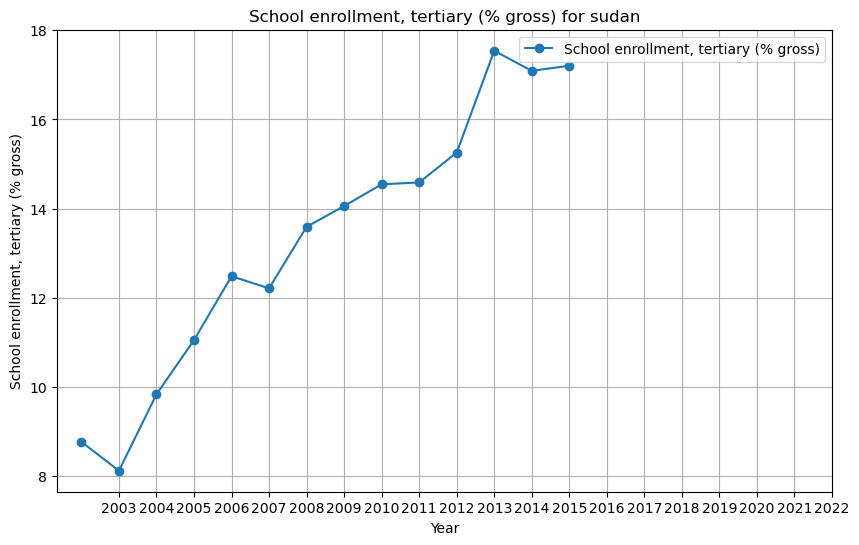

In [124]:
visualize_indicator_with_gaps(df_sudan, 'School enrollment, tertiary (% gross)', 'sudan')


In [125]:
imputation_methods_school_sud = {

    2016: 'mean',
    2017: 'mean',
    2018: 'mean',
    2019: 'mean',
    2020: 'mean',
    2021: 'mean',
    2022: 'mean',



   
}

df_sudan['School enrollment, tertiary (% gross)'] = apply_custom_imputation(
    df_sudan, 
    'School enrollment, tertiary (% gross)', 
    imputation_methods_school_sud
)

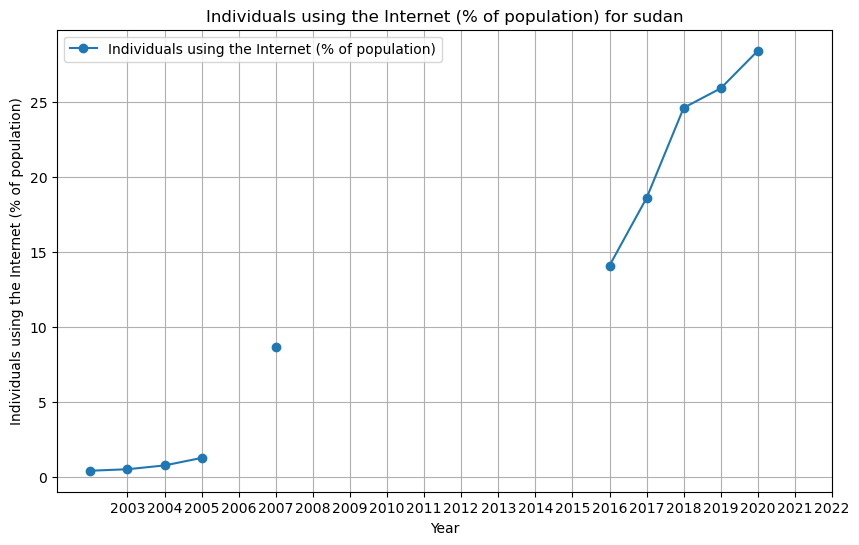

In [126]:
visualize_indicator_with_gaps(df_sudan, 'Individuals using the Internet (% of population)', 'sudan')


In [127]:
imputation_methods_int_sud = {

    2006: 'poly',
    2008: 'poly',
    2009: 'poly',
    2010: 'poly',
    2011: 'poly',
    2012: 'poly',
    2013: 'poly',
    2014: 'poly',
    2015: 'poly',
    2021: 'mean',
    2022: 'mean',


   
}

df_sudan['Individuals using the Internet (% of population)'] = apply_custom_imputation(
    df_sudan, 
    'Individuals using the Internet (% of population)', 
    imputation_methods_int_sud
)

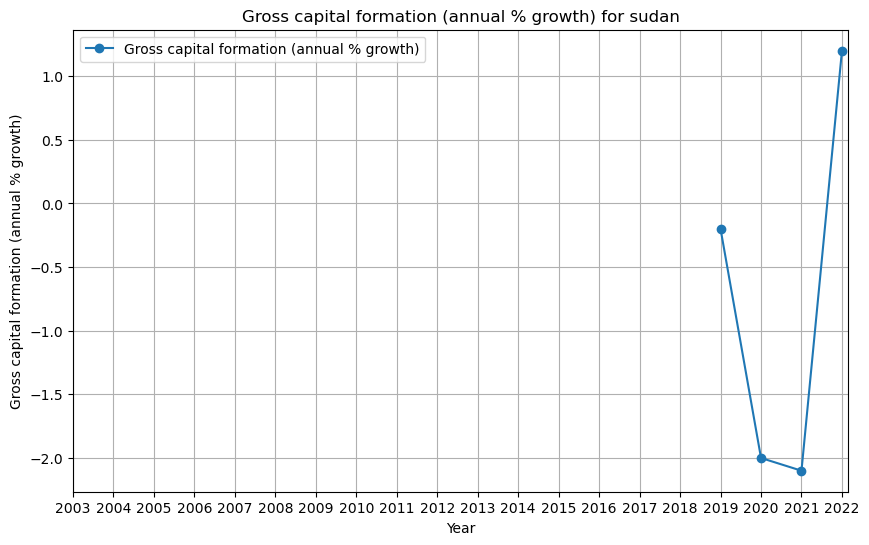

In [128]:
visualize_indicator_with_gaps(df_sudan, 'Gross capital formation (annual % growth)', 'sudan')


In [129]:
imputation_methods_gcf_sud = {

    2002: 'mean',
    2003: 'mean',
    2004: 'mean',
    2005: 'mean',
    2006: 'mean',
    2007: 'mean',
    2008: 'mean',
    2009: 'mean',
    2010: 'mean',
    2011: 'mean',
    2012: 'mean',
    2013: 'mean',
    2014: 'mean',
    2015: 'mean',
    2016: 'mean',
    2017: 'mean',
    2018: 'mean',
    


   
}

df_sudan['Gross capital formation (annual % growth)'] = apply_custom_imputation(
    df_sudan, 
    'Gross capital formation (annual % growth)', 
    imputation_methods_gcf_sud
)

In [130]:
check_missing_values('df_sudan')

print('-------------------------------------')

show_missing_values('df_sudan')

Missing values for df_sudan:
                                                    Missing Values  Percentage
Country Name                                                     0         0.0
Time                                                             0         0.0
Exports of goods and services (% of GDP)                         0         0.0
Foreign direct investment, net inflows (% of GDP)                0         0.0
GDP (current US$)                                                0         0.0
GDP growth (annual %)                                            0         0.0
GDP per capita (current US$)                                     0         0.0
GDP per capita growth (annual %)                                 0         0.0
Inflation, GDP deflator (annual %)                               0         0.0
Trade (% of GDP)                                                 0         0.0
Imports of goods and services (% of GDP)                         0         0.0
Gross capital formation

# COMBINING

In [131]:
import pandas as pd

dfs = [
    df_algeria, df_angola, df_benin, df_botswana, df_burkinafaso,
    df_burundi, df_cameroon, df_congodemrep, df_egyptarabrep,
    df_ghana, df_guinea, df_kenya, df_madagascar, df_mauritania,
    df_mauritius, df_morocco, df_namibia, df_rwanda, df_senegal,
    df_southafrica, df_sudan, df_tanzania, df_togo, df_tunisia, df_uganda
]

massive_df = pd.concat(dfs, ignore_index=True)



In [132]:
massive_df.head(60)

Country Name    Time  Exports of goods and services (% of GDP)  \
0       Algeria  2002.0                                 33.137164   
1       Algeria  2003.0                                 35.669064   
2       Algeria  2004.0                                 38.392959   
3       Algeria  2005.0                                 44.371283   
4       Algeria  2006.0                                 45.764134   
5       Algeria  2007.0                                 44.720156   
6       Algeria  2008.0                                 45.647182   
7       Algeria  2009.0                                 32.586006   
8       Algeria  2010.0                                 34.988230   
9       Algeria  2011.0                                 35.988086   
10      Algeria  2012.0                                 34.382792   
11      Algeria  2013.0                                 30.799365   
12      Algeria  2014.0                                 27.619486   
13      Algeria  2015.0                                 20.528142   
14      Algeria  2016.0                                 18.486688   
15      Algeria  2017.0                                 20.333680   
16      Algeria  2018.0                                 23.423106   
17      Algeria  2019.0                                 20.407942   
18      Algeria  2020.0                                 15.535201   
19      Algeria  2021.0                                 23.882508   
20      Algeria  2022.0                                 31.446856   
21       Angola  2002.0                                 57.084996   
22       Angola  2003.0                                 54.321339   
23       Angola  2004.0                                 58.380358   
24       Angola  2005.0                                 65.526268   
25       Angola  2006.0                                 63.467864   
26       Angola  2007.0                                 67.905783   
27       Angola  2008.0                                 72.475029   
28       Angola  2009.0                                 58.757300   
29       Angola  2010.0                                 61.543116   
30       Angola  2011.0                                 60.669948   
31       Angola  2012.0                                 55.940131   
32       Angola  2013.0                                 50.747086   
33       Angola  2014.0                                 44.695029   
34       Angola  2015.0                                 29.754598   
35       Angola  2016.0                                 28.124485   
36       Angola  2017.0                                 29.004102   
37       Angola  2018.0                                 40.836290   
38       Angola  2019.0                                 40.790755   
39       Angola  2020.0                                 38.314541   
40       Angola  2021.0                                 47.745276   
41       Angola  2022.0                                 44.399617   
42        Benin  2002.0                                 19.726611   
43        Benin  2003.0                                 18.644297   
44        Benin  2004.0                                 18.513548   
45        Benin  2005.0                                 18.483640   
46        Benin  2006.0                                 18.057926   
47        Benin  2007.0                                 22.042853   
48        Benin  2008.0                                 22.140720   
49        Benin  2009.0                                 19.927967   
50        Benin  2010.0                                 23.072048   
51        Benin  2011.0                                 20.849652   
52        Benin  2012.0                                 23.896737   
53        Benin  2013.0                                 27.570565   
54        Benin  2014.0                                 31.430841   
55        Benin  2015.0                                 24.720451   
56        Benin  2016.0                                 27.606788   
5

In [133]:
check_missing_values('massive_df')

Missing values for massive_df:
                                                    Missing Values  Percentage
Country Name                                                     0         0.0
Time                                                             0         0.0
Exports of goods and services (% of GDP)                         0         0.0
Foreign direct investment, net inflows (% of GDP)                0         0.0
GDP (current US$)                                                0         0.0
GDP growth (annual %)                                            0         0.0
GDP per capita (current US$)                                     0         0.0
GDP per capita growth (annual %)                                 0         0.0
Inflation, GDP deflator (annual %)                               0         0.0
Trade (% of GDP)                                                 0         0.0
Imports of goods and services (% of GDP)                         0         0.0
Gross capital formati

In [134]:
massive_df.to_csv('DATAAFTERIMP.csv')